In [ ]:
!huggingface-cli login

In [6]:
from datasets import load_dataset

# If the dataset is gated/private, make sure you have run huggingface-cli login
dataset = load_dataset("imagenet-1k", cache_dir="D:\.cache\huggingface\datasets", split="train[:20%]")

Found cached dataset imagenet-1k (D:/.cache/huggingface/datasets/imagenet-1k/default/1.0.0/a1e9bfc56c3a7350165007d1176b15e9128fcaf9ab972147840529aed3ae52bc)


In [ ]:
dataset.save_to_disk("D:\.cache")

In [2]:
len(dataset)

12812

In [61]:
len([image for image in dataset["train"][:10000]["image"] if image.size[0] / image.size[1] <= 4/3 and image.size[1] / image.size[0] <= 4/3 and image.size[0] >= 224 and image.size[1] >= 224])

5411

In [ ]:
dataset.filter(lambda image: image["image"].size[0] / image["image"].size[1] <= 4/3 and image["image"].size[1] / image["image"].size[0] <= 4/3 and image["image"].size[0] >= 224 and image["image"].size[1] >= 224)

In [81]:
from ImagenetMapping import mapping
imagenet_id_labels = dataset["train"]["label"][:10]
imagenet_labels = [mapping[id] for id in imagenet_id_labels]
imagenet_labels

['plane',
 'comic book',
 'junco',
 'zucchini',
 'stingray',
 'scuba diver',
 'miniskirt',
 'grand piano',
 'parallel bars',
 'syringe']

In [90]:
dataset["train"].drop_index(1)

KeyError: 1

In [107]:
sub_dataset = dataset["train"].select([0, 10, 20, 30, 40, 50])

In [108]:
sub_dataset = sub_dataset.remove_columns(["label"])
sub_dataset = sub_dataset.add_column(name="label", column=[0]*len(sub_dataset))

Loading cached processed dataset at D:\.cache\huggingface\datasets\imagenet-1k\default\1.0.0\a1e9bfc56c3a7350165007d1176b15e9128fcaf9ab972147840529aed3ae52bc\cache-04d8fbf3fbe6b9af.arrow


In [1]:
sub_dataset.save_to_disk("diffusion_and_real")

NameError: name 'sub_dataset' is not defined

In [1]:
from datasets import Image, ClassLabel, load_dataset

In [2]:
test = load_dataset("imagefolder", data_dir=r"C:\Users\Tim\Documents\GitHub\diffusion-detection\data\raw\positive", split="train")

Found cached dataset imagefolder (C:/Users/Tim/.cache/huggingface/datasets/imagefolder/default-c3ddb5038e1ca17b/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


In [3]:
test

Dataset({
    features: ['image'],
    num_rows: 4
})

In [4]:
train_vali = test.train_test_split(test_size=0.2, seed=42)

In [5]:
train_test_vali = train_vali["train"].train_test_split(test_size=0.2, seed=42)

In [6]:
train_test_vali["vali"] = train_vali["test"]

In [7]:
train_test_vali

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 2
    })
    test: Dataset({
        features: ['image'],
        num_rows: 1
    })
    vali: Dataset({
        features: ['image'],
        num_rows: 1
    })
})

In [8]:
test2

NameError: name 'test2' is not defined

In [7]:
test.save_to_disk("diffusion_and_real")

In [31]:
test["train"].features = {'image': Image(decode=True, id=None)}

AttributeError: can't set attribute

In [38]:
test2= test["train"].add_column(name="label", column=[0]*len(test["train"]))

In [44]:
test2.train_test_split(test_size=0.2, seed=42)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 8
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 3
    })
})

In [60]:
test2.filter(lambda image: image["image"].size[0] / image["image"].size[1] <= 4/3 and image["image"].size[1] / image["image"].size[0] <= 4/3 and image["image"].size[0] >= 224 and image["image"].size[1] >= 224)

Dataset({
    features: ['image', 'label'],
    num_rows: 11
})

In [8]:
from PositivesGeneration import generate_positives
generate_positives(["house","duck"])

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .
100%|██████████| 50/50 [00:06<00:00,  7.97it/s]


In [65]:
from datasets import load_from_disk
ds = load_from_disk("diffusion_and_real")

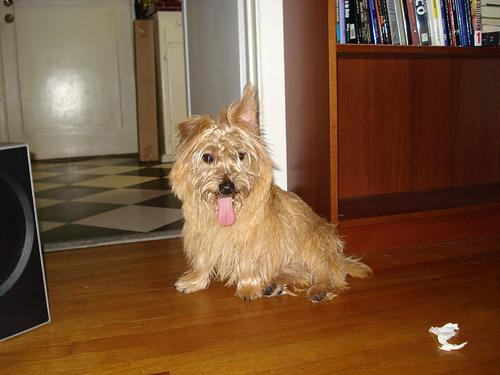

In [66]:
ds["vali"][0]["image"]

In [62]:
from PIL import Image
def crop_image(img):
    width, height = img["image"].size
    target_size = min(width, height)
    left = max(0, (width - target_size ) // 2)
    right = left + target_size
    top = max(0, (height - target_size ) // 2)
    bottom = top + target_size
    img["image"] = img["image"].crop((left, top, right, bottom)).convert('RGB')
    return img
ds = ds.map(crop_image)

Loading cached processed dataset at c:\Users\Tim\Documents\GitHub\diffusion-detection\data\diffusion_and_real\train\cache-757617e3395937f0.arrow
Loading cached processed dataset at c:\Users\Tim\Documents\GitHub\diffusion-detection\data\diffusion_and_real\test\cache-3f95cc13166da938.arrow
Loading cached processed dataset at c:\Users\Tim\Documents\GitHub\diffusion-detection\data\diffusion_and_real\vali\cache-4847ad31ebc22941.arrow


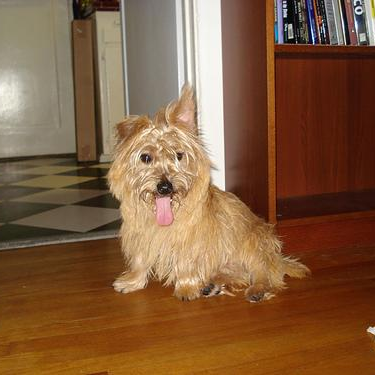

In [64]:
ds["vali"][0]["image"]

In [47]:
ig = ds["vali"][0]["image"]

In [67]:
width, height = 20,20
target_size = min(width, height)
left = max(0, (width - target_size ) // 2)
right = left + target_size
top = max(0, (height - target_size ) // 2)
bottom = top + target_size

In [69]:
right

20